In [86]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import chain

crime_df = pd.read_csv(f"{os.getcwd()}/data/crime.csv")

In [87]:
thanksgiving_days = [
    "2017-11-23",
    "2018-11-22",
    "2019-11-28",
    "2020-11-26",
    "2021-11-25",
]

def get_weeks_of_date(date: str) -> list[str]:
    year, month, day = date.split("-")
    counter = -3
    weekdays: list[str] = []
    while counter <= 3:
        if counter == 0:
            counter +=1
            continue
        d = int(day) + counter
        m = int(month)
        if d > 30:
            d = 1
            m = m + 1

        weekdays.append(f"{year}-{m}-{d}")
        counter += 1 

    return weekdays

thanksgivin_week_dates = list(chain.from_iterable([get_weeks_of_date(d) for d in thanksgiving_days]))

thanksgivin_week_dates



['2017-11-20',
 '2017-11-21',
 '2017-11-22',
 '2017-11-24',
 '2017-11-25',
 '2017-11-26',
 '2018-11-19',
 '2018-11-20',
 '2018-11-21',
 '2018-11-23',
 '2018-11-24',
 '2018-11-25',
 '2019-11-25',
 '2019-11-26',
 '2019-11-27',
 '2019-11-29',
 '2019-11-30',
 '2019-12-1',
 '2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-27',
 '2020-11-28',
 '2020-11-29',
 '2021-11-22',
 '2021-11-23',
 '2021-11-24',
 '2021-11-26',
 '2021-11-27',
 '2021-11-28']

In [88]:
weekdays_df = pd.DataFrame()
weekdays_df["dates"] = thanksgivin_week_dates
weekdays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(weekdays_df["dates"])
weekdays_df["YEAR"] = weekdays_df["REPORTED_DATE_NORMALIZED"].dt.year
weekdays_df = weekdays_df.drop(labels="dates", axis=1)
weekdays_df["TYPE"] = "Thanksgiving week"

weekdays_df

thadays_df = pd.DataFrame()
thadays_df["dates"] = thanksgiving_days
thadays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(thadays_df["dates"])
thadays_df["YEAR"] = thadays_df["REPORTED_DATE_NORMALIZED"].dt.year
thadays_df = thadays_df.drop(labels="dates", axis=1)
thadays_df["TYPE"] = "Thanksgiving day"

thadays_df

,REPORTED_DATE_NORMALIZED,YEAR,TYPE
0,2017-11-23,2017,Thanksgiving day
1,2018-11-22,2018,Thanksgiving day
2,2019-11-28,2019,Thanksgiving day
3,2020-11-26,2020,Thanksgiving day
4,2021-11-25,2021,Thanksgiving day


In [105]:
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()

In [108]:
is_traffic = crime_df["OFFENSE_CATEGORY_ID"] == "traffic-accident" 
traffic_df = crime_df[is_traffic]

# traffic_df["dates"] = pd.to_datetime(traffic_df["REPORTED_DATE"])
# traffic_df["REPORTED_DATE_NORMALIZED"] = traffic_df["dates"].dt.normalize()


weekdays = pd.merge(
    traffic_df, weekdays_df, on="REPORTED_DATE_NORMALIZED"
)
thadays = pd.merge(
    traffic_df, thadays_df, on="REPORTED_DATE_NORMALIZED"
)


In [126]:
weekdays_total = pd.merge(
    crime_df, weekdays_df, on="REPORTED_DATE_NORMALIZED"
)

year_count_total = weekdays_total.groupby("YEAR", as_index=False).size()
year_count_total = year_count_total.rename({'YEAR': 'YEAR', 'size': 'TOTAL'}, axis=1)
year_count_total["TOTAL"] = year_count_total["TOTAL"] / 6
year_count_total["TOTAL"] = year_count_total["TOTAL"].round(0)

# totaal aantal crimes op dagen rond thanksgivingsday
year_count_total

,YEAR,TOTAL
0,2017,226.0
1,2018,228.0
2,2019,196.0
3,2020,221.0
4,2021,252.0


In [130]:
# weekdays

week_count = weekdays.groupby(
    "YEAR", as_index=False
).size()

week_count["size"] = week_count["size"] / 6
week_count["size"] = week_count["size"].round(0)

week_count["TYPE"] = "Gemiddelde van de week"

week_count["TOTAL"] = year_count_total["TOTAL"]

week_count["Percentage"] = week_count["size"] / week_count["TOTAL"]

## overzicht dagen week thagiving gemiddeld traffix acc + totaal gemiddeld per dag + percentage gemiddeld per dag
week_count

,YEAR,size,TYPE,TOTAL,Percentage
0,2017,53.0,Gemiddelde van de week,226.0,0.234513
1,2018,57.0,Gemiddelde van de week,228.0,0.250000
2,2019,55.0,Gemiddelde van de week,196.0,0.280612
3,2020,38.0,Gemiddelde van de week,221.0,0.171946
4,2021,41.0,Gemiddelde van de week,252.0,0.162698


In [129]:
thadays_total = pd.merge(
    crime_df, thadays_df, on="REPORTED_DATE_NORMALIZED"
)

year_count_days = thadays_total.groupby("YEAR", as_index=False).size()
year_count_days = year_count_days.rename({'YEAR': 'YEAR', 'size': 'TOTAL'}, axis=1)
year_count_days["TOTAL"] = year_count_days["TOTAL"].round(0)

# totaal aantal crimes op dagen rond thanksgivingsday
year_count_days

,YEAR,TOTAL
0,2017,129
1,2018,114
2,2019,118
3,2020,133
4,2021,159


In [131]:
thadays

thadays_count = thadays.groupby("YEAR", as_index=False).size()
thadays_count["TYPE"] = "Dag"
thadays_count["TOTAL"] = year_count_days["TOTAL"]

thadays_count["Percentage"] = thadays_count["size"] / thadays_count["TOTAL"]


thadays_count

,YEAR,size,TYPE,TOTAL,Percentage
0,2017,23,Dag,129,0.178295
1,2018,25,Dag,114,0.219298
2,2019,41,Dag,118,0.347458
3,2020,27,Dag,133,0.203008
4,2021,32,Dag,159,0.201258


In [132]:
total = pd.concat([thadays_count, week_count])
total

,YEAR,size,TYPE,TOTAL,Percentage
0,2017,23.0,Dag,129.0,0.178295
1,2018,25.0,Dag,114.0,0.219298
2,2019,41.0,Dag,118.0,0.347458
3,2020,27.0,Dag,133.0,0.203008
4,2021,32.0,Dag,159.0,0.201258
0,2017,53.0,Gemiddelde van de week,226.0,0.234513
1,2018,57.0,Gemiddelde van de week,228.0,0.250000
2,2019,55.0,Gemiddelde van de week,196.0,0.280612
3,2020,38.0,Gemiddelde van de week,221.0,0.171946
4,2021,41.0,Gemiddelde van de week,252.0,0.162698


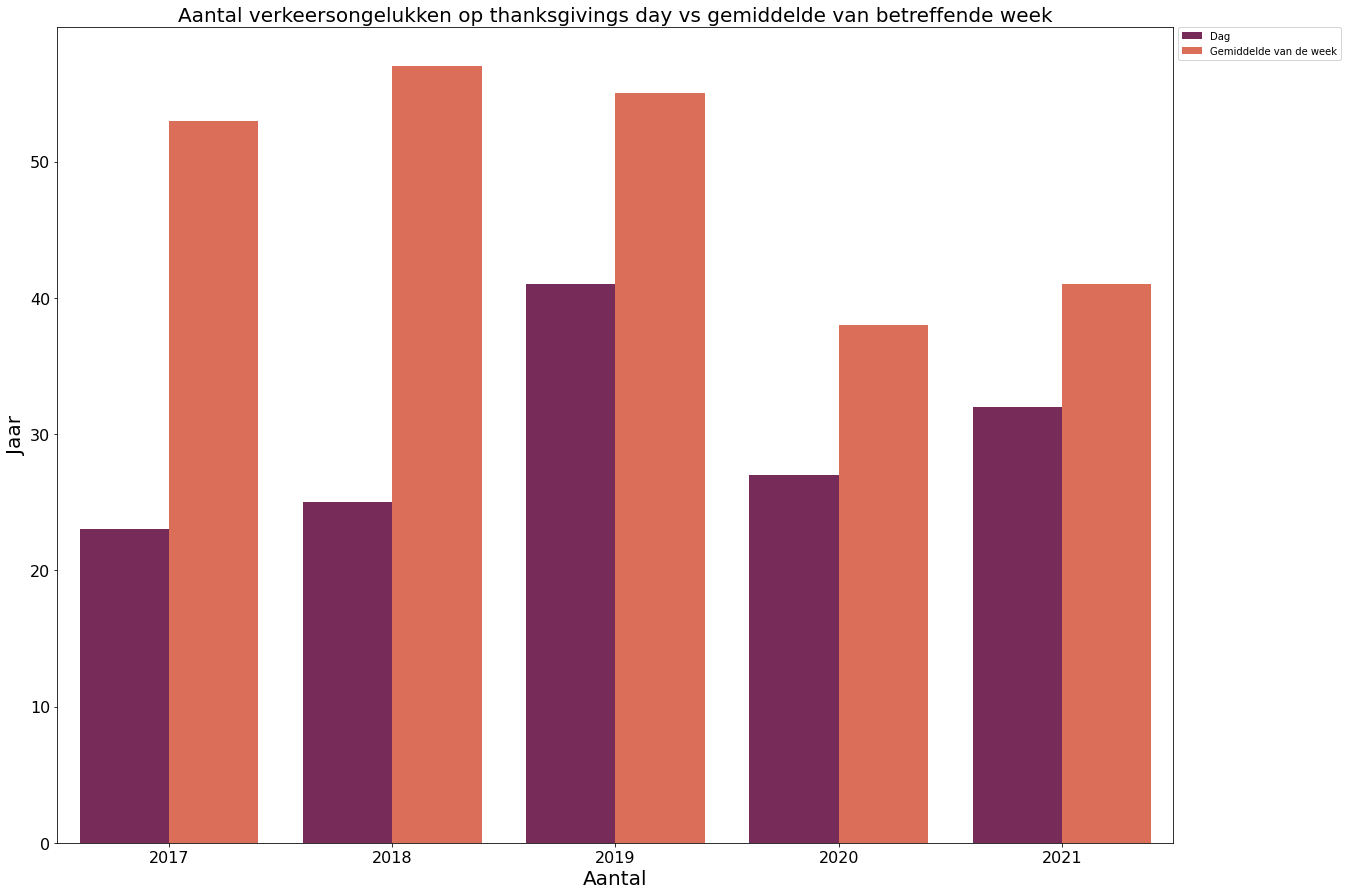

In [103]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax,
    data=total,
    x="YEAR",
    y="size",
    hue="TYPE",
    palette="rocket",
)
ax.set(xlabel="Jaar", ylabel="Aantal")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Aantal verkeersongelukken op thanksgivings day vs gemiddelde van betreffende week", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Aantal", fontsize=20)
plt.ylabel("Jaar", fontsize=20)

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

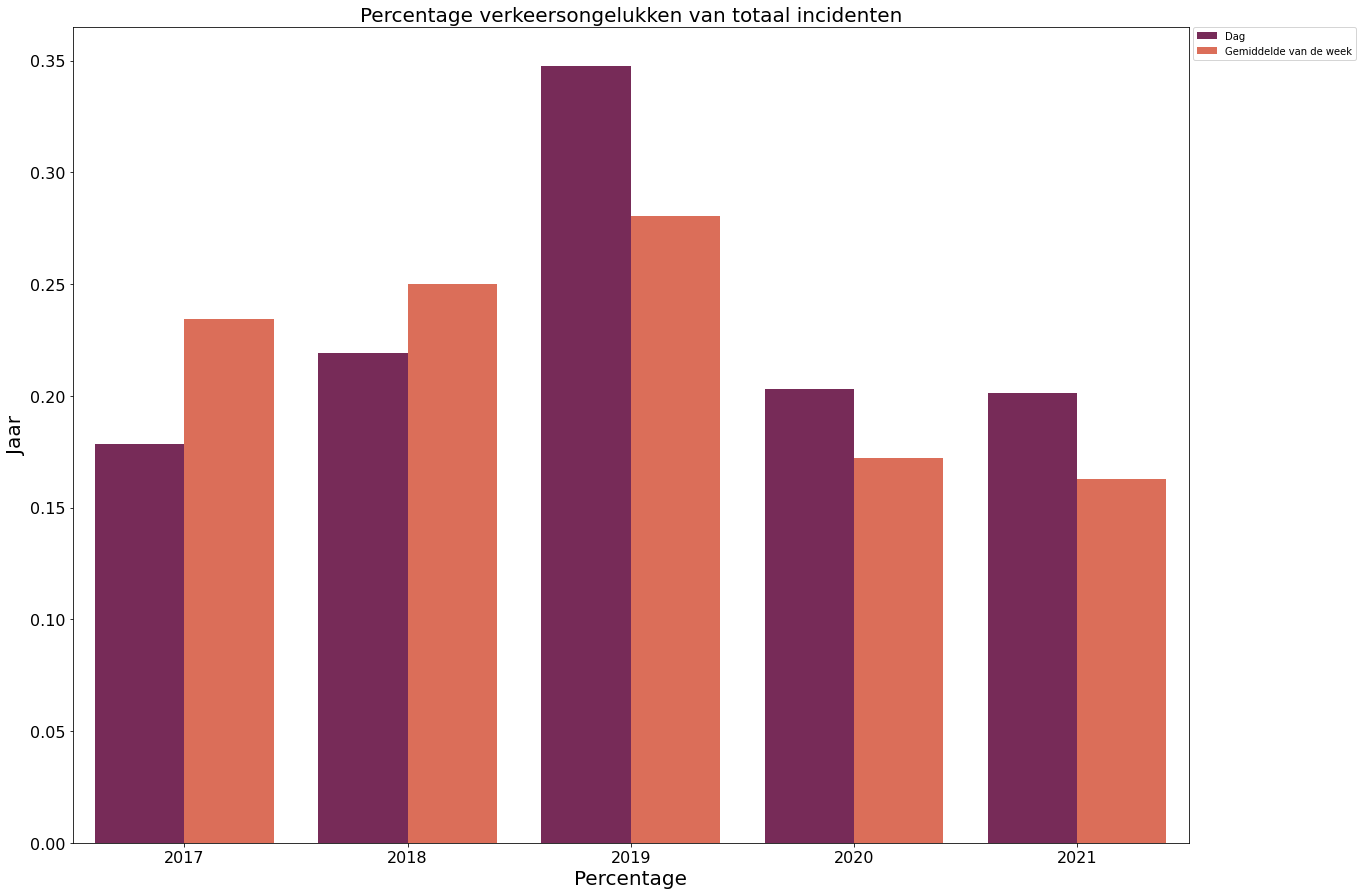

In [134]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax,
    data=total,
    x="YEAR",
    y="Percentage",
    hue="TYPE",
    palette="rocket",
)
ax.set(xlabel="Jaar", ylabel="Aantal")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Percentage verkeersongelukken van totaal incidenten", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Percentage", fontsize=20)
plt.ylabel("Jaar", fontsize=20)

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()